In [121]:
# Load data
from pathlib import Path

samples_file = "data/qmc/qmc_forward_3.txt"
with Path.cwd().joinpath(samples_file).open("r") as f:
    samples = [int(line) for line in f.readlines()]
    print(samples)

# conver to mG
samples_mg = [s * (2000/32768) for s in samples]
print(samples_mg)


[8405, 8372, 8372, 8382, 8410, 8362, 8420, 8387, 8395, 8395, 8367, 8377, 8352, 8387, 8362, 8440, 8382, 8400, 8367, 8382, 8382, 8400, 8410, 8310, 8450, 8382, 8387, 8400, 8415, 8382, 8342, 8430, 8382, 8362, 8372, 8387, 8395, 8395, 8357, 8400, 8387, 8300, 8367, 8405, 8372, 8362, 8387, 8455, 8372, 8377, 8372, 8395, 8367, 8415, 8387, 8377, 8400, 8372, 8362, 8395, 8425, 8352, 8367, 8322, 8377, 8362, 8382, 8382, 8362, 8382, 8395, 8387, 8387, 8395, 8367, 8395, 8382, 8367, 8315, 8322, 8367, 8382, 8382, 8395, 8387, 8362, 8357, 8405, 8395, 8415, 8357, 8395, 8352, 8357, 8377, 8367, 8337, 8405, 8367, 8400, 8400, 8367, 8367, 8415, 8372, 8387, 8405, 8377, 8410, 8415, 8425, 8387, 8400, 8410, 8377, 8430, 8357, 8372, 8347, 8362, 8357, 8377, 8387, 8387, 8352, 8395, 8362, 8400, 8377, 8377, 8395, 8347, 8395, 8382, 8352, 8357, 8382, 8357, 8377, 8377, 8347, 8395, 8357, 8405, 8382, 8377, 8405, 8362, 8342, 8357, 8377, 8395, 8382, 8352, 8395, 8332, 8372, 8305, 8400, 8362, 8357, 8410, 8382, 8347, 8322, 8367, 833

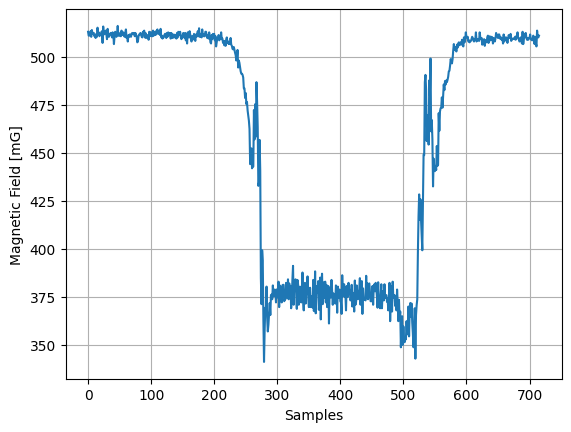

In [122]:
# Plot
import matplotlib.pyplot as plt

plt.plot(list(range(len(samples_mg))), samples_mg)
plt.xlabel("Samples")
plt.ylabel("Magnetic Field [mG]")
plt.grid(True)
plt.show()


697


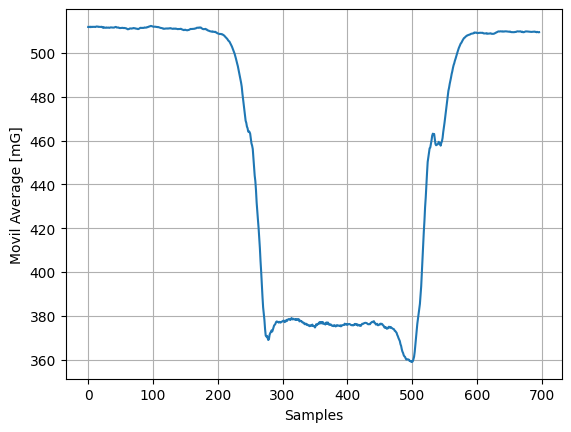

In [123]:
# Compute Movil Average
import numpy as np

windows = 20
movil_average = np.convolve(samples_mg, np.ones(windows)/windows, mode='valid')
print(len(movil_average))

plt.plot(list(range(len(movil_average))), movil_average)
plt.xlabel("Samples")
plt.ylabel("Movil Average [mG]")
plt.grid(True)
plt.show()


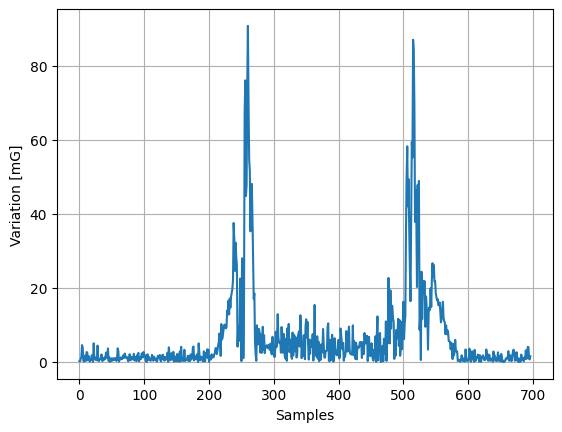

In [124]:
variation = np.abs(movil_average - np.array(samples_mg[windows-1:]))

plt.plot(list(range(len(variation))), variation)
plt.xlabel("Samples")
plt.ylabel("Variation [mG]")
plt.grid(True)
plt.show()

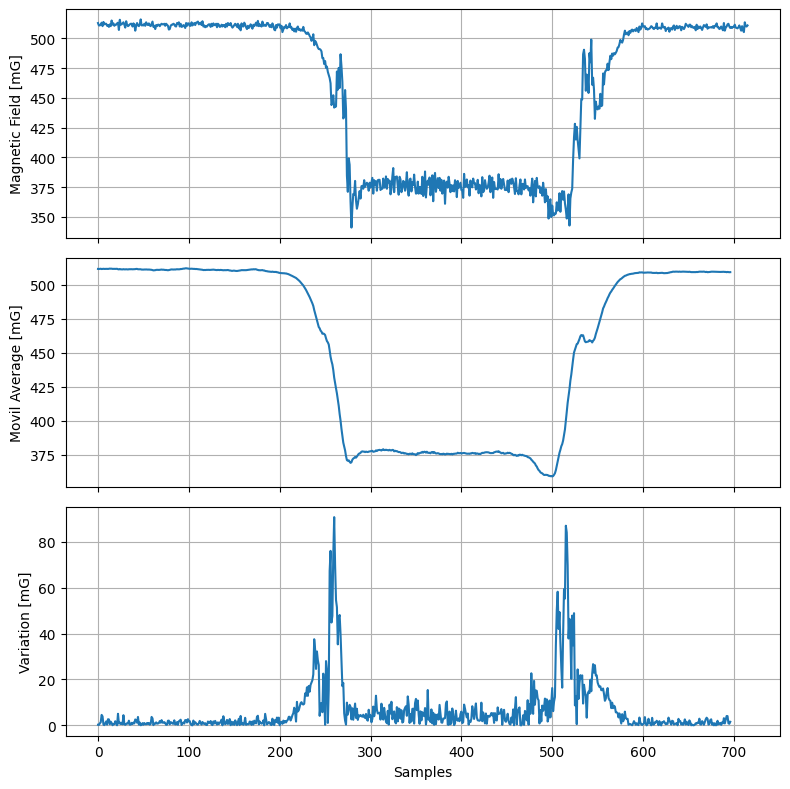

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

#Plot 1: Magnetic Field
ax1.plot(list(range(len(samples_mg))), samples_mg)
ax1.set_ylabel("Magnetic Field [mG]")
ax1.grid(True)

# Plot 1: Movil Average
ax2.plot(list(range(len(movil_average))), movil_average)
ax2.set_ylabel('Movil Average [mG]')
ax2.grid(True)

# Plot 2: Variation
ax3.plot(list(range(len(variation))), variation, label='Diferencia Absoluta')
ax3.set_ylabel('Variation [mG]')
ax3.set_xlabel('Samples')
ax3.grid(True)

plt.tight_layout()
plt.show()
